## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Load the Data
- The Wine dataset contains 178 samples with 13 features, such as alcohol, malic acid, ash, etc.
- The target variable is the class of wine (3 classes: 0, 1, 2).

In [2]:
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target variable

# Create a DataFrame for better visualization
wine_df = pd.DataFrame(data=X, columns=wine.feature_names)
wine_df['target'] = y
wine_df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

# Data Visualization
- The pairplot function from Seaborn creates scatter plots for selected features.

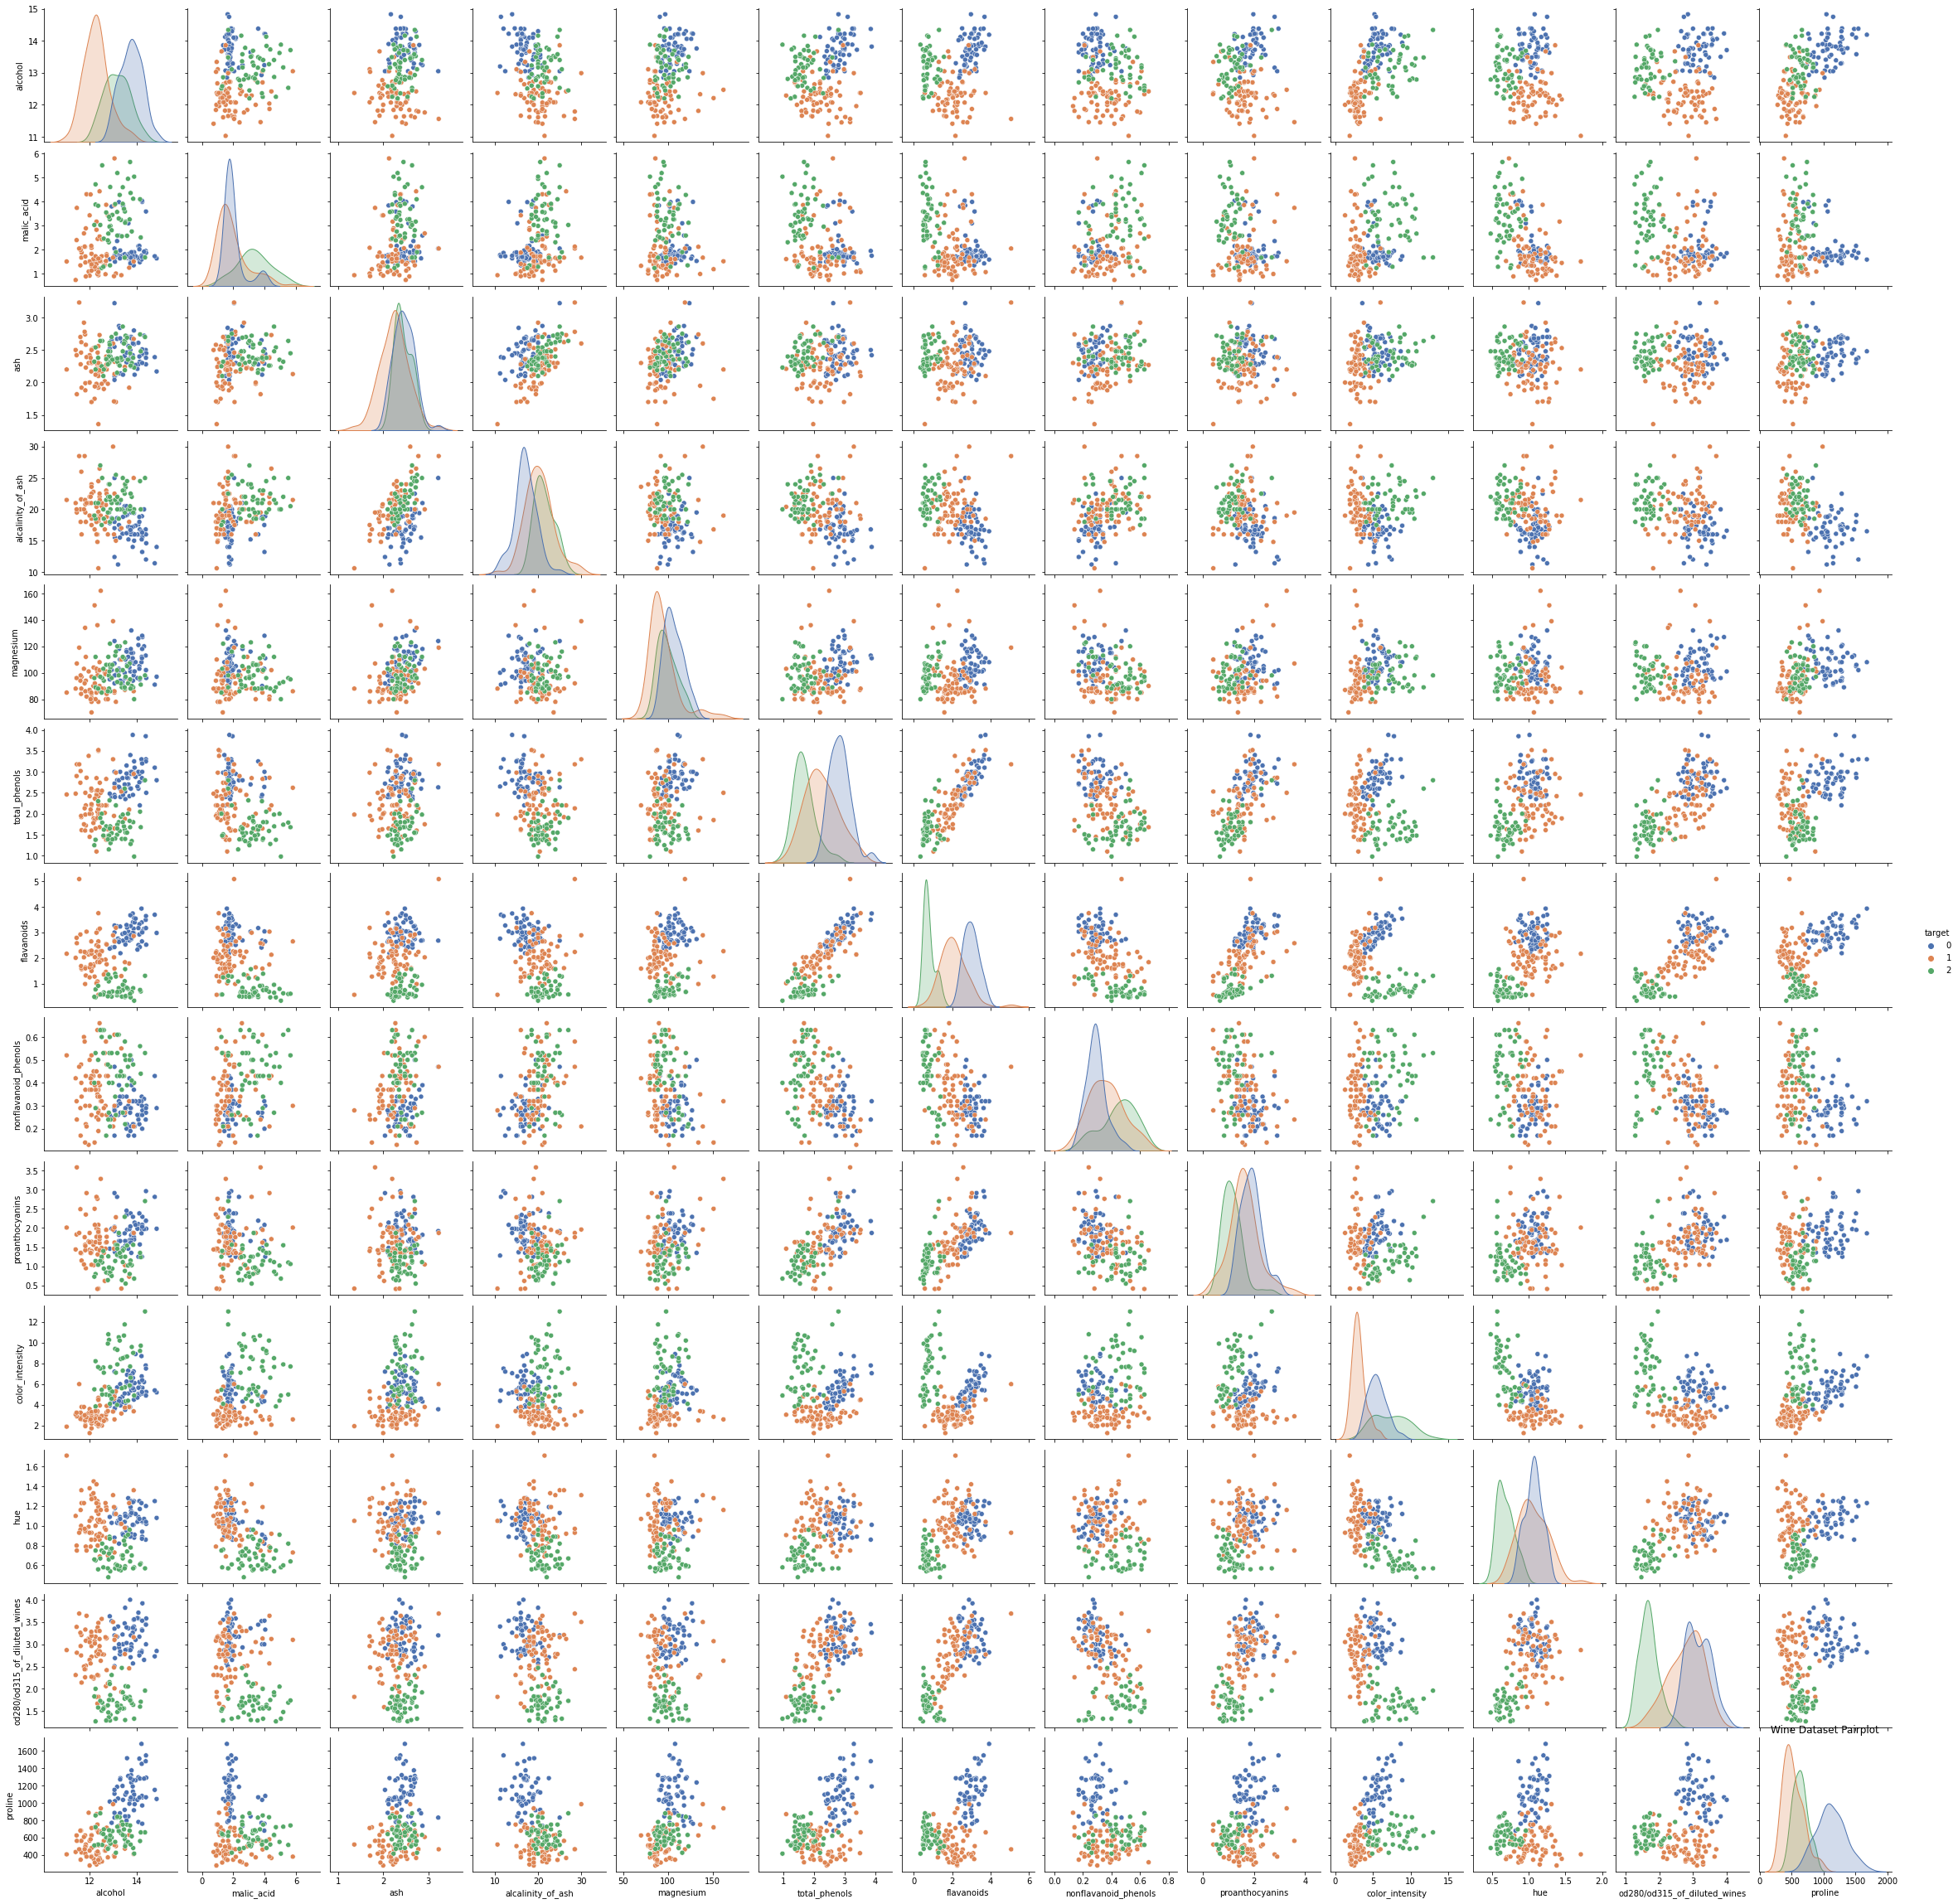

In [4]:
sns.pairplot(wine_df, hue='target', palette='deep')
plt.title("Wine Dataset Pairplot")
plt.show()

# Split the Data
- The train_test_split function divides the dataset into training (80%) and testing (20%) subsets.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the AdaBoost Classifier
- AdaBoost with a Decision Tree base estimator is initialized and trained on the training data.

In [4]:
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

D:\Miniconda\envs\eme\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=42)

## Make Predictions & Evaluate the Model
- The predict method generates predictions for both the training and testing datasets.
- The model's performance is evaluated using confusion matrix and classification report.

In [5]:
y_train_pred = adaboost_model.predict(X_train)
y_test_pred = adaboost_model.predict(X_test)



print("Confusion Matrix: Train Data")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred))

print("============================================================================")

print("Confusion Matrix: Test Data")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

Confusion Matrix: Train Data
[[45  0  0]
 [ 0 57  0]
 [ 0  0 40]]

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        40

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142

Confusion Matrix: Test Data
[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

